** Preprocess Missing Values & Encode Categorical Variables**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/loan_approval_dataset (1).csv')

df.columns = df.columns.str.strip()

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Models**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

**Compare Accuracy, Precision, Recall, and Feature Importance**


Decision Tree Evaluation:
Accuracy: 0.9742388758782201
Precision: 0.9742828417054793
Recall: 0.9742388758782201
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854


Random Forest Evaluation:
Accuracy: 0.9765807962529274
Precision: 0.9765619791194287
Recall: 0.9765807962529274
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854


Gradient Boosting Evaluation:
Accuracy: 0.9754098360655737
Precision: 0.9755768172517093
Recall: 0.9754098360655737
   

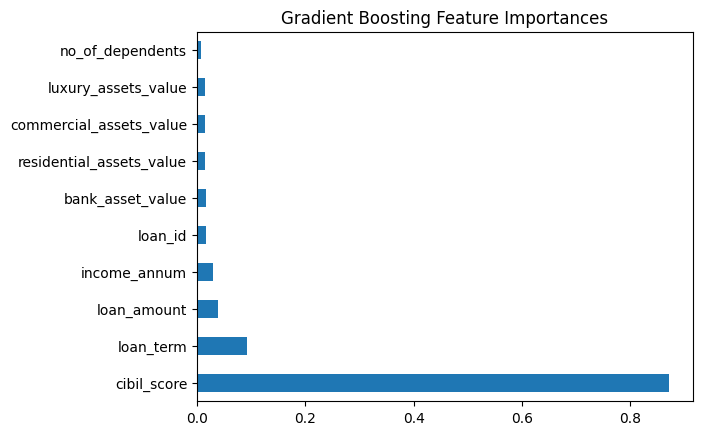

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

models = {'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))

    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh', title=f'{name} Feature Importances')
